In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('sentiment_tariff_electronics_annual_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     26 non-null     object 
 1   year             26 non-null     int64  
 2   sentiment_fixed  26 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 756.0+ bytes


In [9]:
target_years = list(range(2020, 2026))  # 2020 to 2025 inclusive

new_rows = []

for country in df['country_name'].unique():
    country_df = df[df['country_name'] == country]
    existing_years = set(country_df['year'])
    missing_years = [y for y in target_years if y not in existing_years]

    if not missing_years:
        continue
    
    # Calculate median sentiment_fixed for the country (ignoring NaNs)
    median_sentiment = country_df['sentiment_fixed'].median()
    
    for year in missing_years:
        new_rows.append({
            'country_name': country,
            'year': year,
            'sentiment_fixed': median_sentiment
        })

new_rows_df = pd.DataFrame(new_rows)
df_extended = pd.concat([df, new_rows_df], ignore_index=True)

# Optional: sort the DataFrame nicely
df_extended = df_extended.sort_values(['country_name', 'year']).reset_index(drop=True)

df_extended

,country_name,year,sentiment_fixed
0,China,2020,-0.397946
1,China,2021,-0.555556
2,China,2022,-0.397946
3,China,2023,0.000000
4,China,2024,-0.405415
5,China,2025,-0.390476
6,Germany,2020,-0.242470
7,Germany,2021,-0.242470
8,Germany,2022,-0.242470
9,Germany,2023,-0.242470


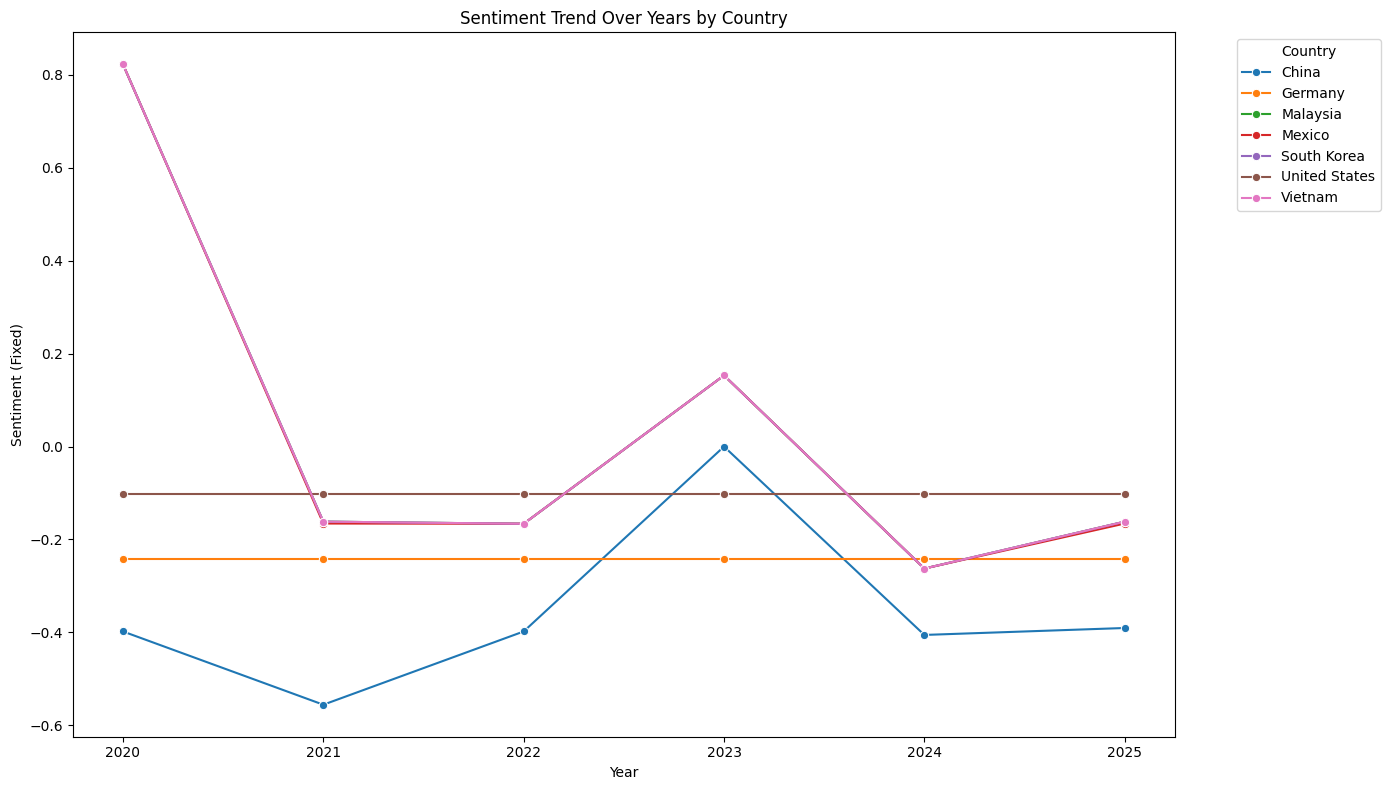

In [16]:
plt.figure(figsize=(14, 8))

# Line plot showing trend of sentiment over years per country
sns.lineplot(data=df_extended, x='year', y='sentiment_fixed', hue='country_name', marker='o')

plt.title('Sentiment Trend Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Sentiment (Fixed)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('sentiment.jpg')
plt.show()

In [14]:
print(df_extended['country_name'].unique())

['China' 'Germany' 'Malaysia' 'Mexico' 'South Korea' 'United States'
 'Vietnam']


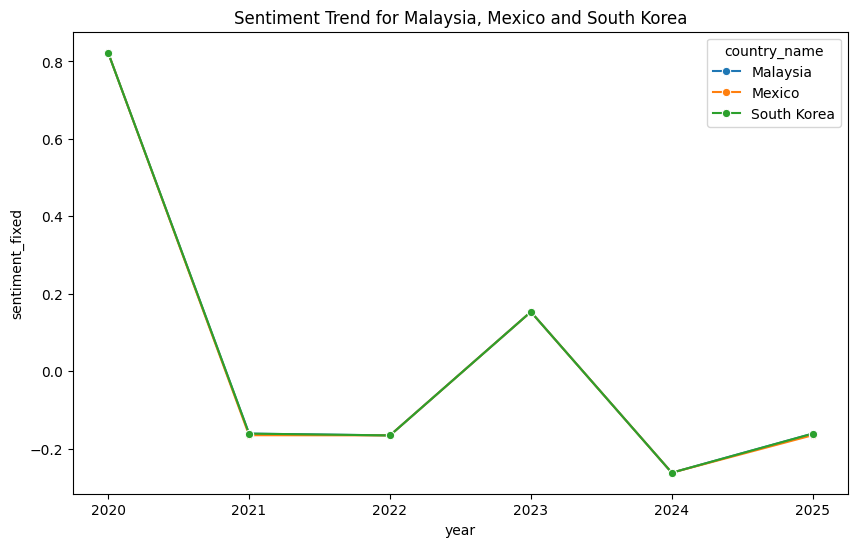

In [15]:
subset = df_extended[df_extended['country_name'].isin(['Malaysia', 'Mexico', 'South Korea'])]

plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='year', y='sentiment_fixed', hue='country_name', marker='o')
plt.title('Sentiment Trend for Malaysia, Mexico and South Korea')
plt.show()